In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 

In [4]:
SPOTIFY_CLIENT_ID = '2ec294682f3d4d53a0b933dc486bd294'
SPOTIFY_CLIENT_SECRET = '4c3845c0b99442239e636930b6410122'
# SPOTIFY_REDIRECT_URI = ''

In [5]:
auth_manager = SpotifyClientCredentials(client_id=SPOTIFY_CLIENT_ID, client_secret=SPOTIFY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)
sp.me 

<bound method Spotify.me of <spotipy.client.Spotify object at 0x000001701D83BE50>>

SEARCHING ALBUMS BY NAME

In [ ]:
albums = sp.search(q='album:'+'444',type='album', limit=20)
album_list = albums['albums']['items']
if len(album_list)> 0:
    for album in album_list:
        print(album['name'] + "- By - " + album['artists'][0]['name'])
        print('Track ID:' + album['id'] + " / Artist ID -" + album['artists'][0]['id'])
        print("----------")

SEARCHING TRACKS BY NAME

In [34]:
results = sp.search(q='track:'+'money', type='track', limit=20)
len(results)
track_list = results['tracks']['items']
if len(track_list)> 0:
    for track in track_list:
        print(track['name'] + '- By -' + track['artists'][0]['name'])
        print('Track ID: ' + track['id'] + ' / Artist ID - ' + track['artists'][0]['id'])
        print("----------")


Betty (Get Money)- By -Yung Gravy
Track ID: 4cacyP5c3PMlfnyjpg13xW / Artist ID - 2YOYua8FpudSEiB9s88IgQ
----------
Money Trees- By -Kendrick Lamar
Track ID: 2HbKqm4o0w5wEeEFXm2sD4 / Artist ID - 2YZyLoL8N0Wb9xBt1NhZWg
----------
Monëy so big- By -Yeat
Track ID: 7BbaIYAdi3pg4MGl6PHwPv / Artist ID - 3qiHUAX7zY4Qnjx8TNUzVx
----------
CODE (feat. Moneybagg Yo)- By -Offset
Track ID: 5uVW9FWVaQde0lfF4hYs4C / Artist ID - 4DdkRBBYG6Yk9Ka8tdJ9BW
----------
Money Longer- By -Lil Uzi Vert
Track ID: 0B8QzDH7YWih85V5SEMnyJ / Artist ID - 4O15NlyKLIASxsJ0PrXPfz
----------
worldstar money (interlude)- By -Joji
Track ID: 0baNzeUcPQnQSagpe8T0mD / Artist ID - 3MZsBdqDrRTJihTHQrO6Dq
----------
Money In The Grave (Drake ft. Rick Ross)- By -Drake
Track ID: 5ry2OE6R2zPQFDO85XkgRb / Artist ID - 3TVXtAsR1Inumwj472S9r4
----------
Run It Up (feat. Offset & Moneybagg Yo)- By -Lil Tjay
Track ID: 1dg3qy5DjoJodawfOCgrTP / Artist ID - 6jGMq4yGs7aQzuGsMgVgZR
----------
Big 14 (feat. Offset & Moneybagg Yo)- By -Trippie 

SEARCHING ALBUMS BY ARTISTS 

In [30]:
artist_id = '2YZyLoL8N0Wb9xBt1NhZWg'
artist_uri = 'spotify:artist:' + artist_id 
results = sp.artist_albums(artist_uri, album_type='album', limit=20)
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

list_of_albums = []
for album in albums:
    list_of_albums.append(album['name'] + '( Singer: ' + album['artists'][0]['name'] + ' ) ' )

for item in set(list_of_albums):
    print(item)

Overly Dedicated( Singer: Kendrick Lamar ) 
Mr. Morale & The Big Steppers( Singer: Kendrick Lamar ) 
good kid, m.A.A.d city( Singer: Kendrick Lamar ) 
To Pimp A Butterfly( Singer: Kendrick Lamar ) 
untitled unmastered.( Singer: Kendrick Lamar ) 
DAMN. COLLECTORS EDITION.( Singer: Kendrick Lamar ) 
DAMN.( Singer: Kendrick Lamar ) 
Black Panther The Album Music From And Inspired By( Singer: Kendrick Lamar ) 
Section.80( Singer: Kendrick Lamar ) 
good kid, m.A.A.d city (Deluxe)( Singer: Kendrick Lamar ) 


AUDIO FEATURES

In [37]:
track_features = sp.audio_features('2HbKqm4o0w5wEeEFXm2sD4')
print(track_features)

[{'danceability': 0.716, 'energy': 0.531, 'key': 7, 'loudness': -7.355, 'mode': 1, 'speechiness': 0.122, 'acousticness': 0.0703, 'instrumentalness': 0, 'liveness': 0.224, 'valence': 0.344, 'tempo': 71.994, 'type': 'audio_features', 'id': '2HbKqm4o0w5wEeEFXm2sD4', 'uri': 'spotify:track:2HbKqm4o0w5wEeEFXm2sD4', 'track_href': 'https://api.spotify.com/v1/tracks/2HbKqm4o0w5wEeEFXm2sD4', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2HbKqm4o0w5wEeEFXm2sD4', 'duration_ms': 386907, 'time_signature': 4}]


In [39]:
import pandas as pd
df = pd.DataFrame(track_features, index=[0])
df_features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
df_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.0703,0.716,0.531,0,0.224,0.122,0.344


In [41]:
def feature_plot(features):
    #Import Libraries for Feature plot
    import numpy as np
    import matplotlib.pyplot as plt

    labels= list(features)[:]
    stats= features.mean().tolist()

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    #Size of the figure
    fig=plt.figure(figsize = (18,18))

    ax = fig.add_subplot(221, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2, label = "Features", color= 'gray')
    ax.fill(angles, stats, alpha=0.25, facecolor='gray')
    ax.set_thetagrids(angles[0:7] * 180/np.pi, labels , fontsize = 13)


    ax.set_rlabel_position(250)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
    plt.ylim(0,1)

    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))



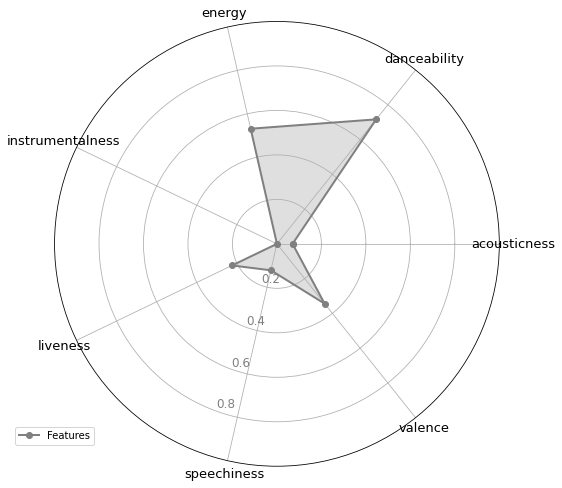

In [42]:
feature_plot(df_features)


In [43]:
# get track features 
def get_features(track_id):
    track_features_x = sp.audio_features(track_id)
    dfx = pd.DataFrame(track_features_x, index=[0])
    dfx_features = dfx.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
    return dfx_features

In [68]:
mafia_music = get_features('74tLlkN3rgVzRqQJgPfink')
money_trees = get_features('2HbKqm4o0w5wEeEFXm2sD4')
A_lot = get_features('2fQrGHiQOvpL9UgPvtYy6G')




In [71]:
from turtle import color


def feature_plot2(mafia_music, A_lot):
    #Import Libraries for Feature plot
    import numpy as np
    import matplotlib.pyplot as plt
    
    labels= list(mafia_music)[:]
    stats= mafia_music.mean().tolist()
    stats2 = A_lot.mean().tolist()

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    # close the plot
    stats = np.concatenate((stats,[stats[0]]))
    stats2 = np.concatenate((stats2,[stats2[0]])) 
    angles = np.concatenate((angles,[angles[0]]))

    # Size of the figure
    fig=plt.figure(figsize = (18,18))

    ax = fig.add_subplot(221, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2, label = "Mafia Music", color= 'blue')
    ax.fill(angles, stats, alpha=0.25, facecolor='blue')
    ax.set_thetagrids(angles[0:7] * 180/np.pi, labels , fontsize = 13, color = 'white')

    ax.set_rlabel_position(250)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color = "grey", size=12)
    plt.ylim(0,1)

    ax.plot(angles, stats2, 'o-', linewidth=2, label = "A_lot", color = 'm')
    ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
    ax.set_title('Mean Values of the audio features')
    ax.grid(True)

    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

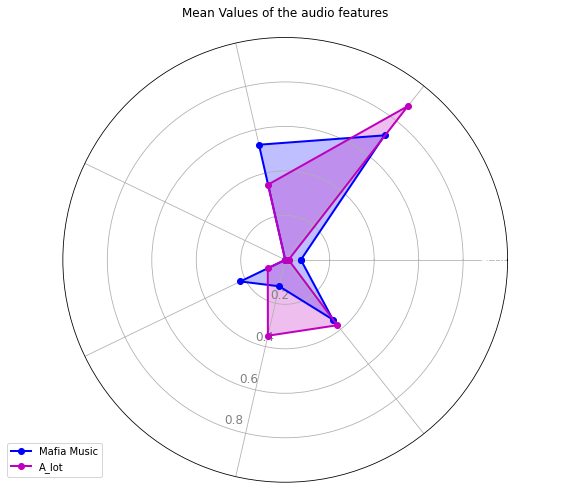

In [72]:
feature_plot2(mafia_music, A_lot)
